ECE 447: Frequently Asked Questions
===

Prof. Eric Klavins

&copy; 2019, University of Washington

In [16]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

from control import * 

# Comment out in Google colab 
init_printing(use_latex='mathjax')

# Uncomment in below Google colab to render sympy equations nicely
# def custom_latex_printer(exp,**options):
#     from google.colab.output._publish import javascript
#     url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
#     javascript(url=url)
#     return printing.latex(exp,**options)
# init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

**Q:** How do you determine an eigenvector from Jordan form? 

**A**: The same way you do with any other matrix. The main issue is that non-trivial Jordan blocks form matrices will have repeated eigenvectors. For example,

$$
J_2(1) = \begin{pmatrix}
1 & 1 \\
0 & 1
\end{pmatrix}
$$

has eigenvalues 1 and 1. The eigenvalue equation $A \x = \lambda \x$ amounts to

\begin{align}
x_1 + x_2 & = x_1 \\
x_2 = x_2 
\end{align}

That first equation basically says $x_2 = 0$. So you get eigenvectors that are any multiple of 

$$
{\bf v} = \begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

You can see this in Python too.

In [8]:
# J has eigenvalue 1 with multiplity 2 and only one eigenvector.
J = Matrix([[1,1],[0,1]])
J.eigenvects()

⎡⎛1, 2, ⎡⎡1⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠⎦

----

**Q:** Why do we need Jordan form?

**A:** Mainly just to compute the matrix exponential easily. If you recall, we showed that computing the matrix exponential of Jordan blocks was easy. Then, since any matrix $A$ can be written as $A = P J P^{-1}$ we can just compute $e_J$ to get $e^A = P e^J P^{-1}$.

----
**Q:** Why do we need to compute the matrix exponential?

**A:** Because if you have a matrix differential equation $\dot \x = A \x$ with initial condition $\x(0)$, then the solution to the equation is 

$$
\x(t) = e^{At} \x(0)
$$

----
**Q:** What is $y$?

**A:** $y$ is usually the *output* of our system. In general, if we have
    
\begin{align}
\dot \x & = A \x + B u \\
y & = C \x
\end{align}    

then $\x$ is the system's internal state, $u$ is the input we can apply to the system, and $y$ is the output we can see. The feedback control problem is to find $u$ as a function of $y$ so that the resulting system performs as desired.

----

**Q:** For this system:

$$
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2 \\
a \sin x_1 + b u \cos x_1
\end{pmatrix} .
$$

$$
y = x_1
$$

how do you find the equilibrium point with $u=0$? 

**A:** Find  

$$
\begin{pmatrix}
x_2 \\
a \sin x_1 
\end{pmatrix} = \begin{pmatrix}
0 \\
0
\end{pmatrix}
$$

which is any multiple of $\pi$ for $x_1$ and zero for $x_2$.

----

**Q:** We are making linear controllers for nonlinear systems around equilibrium points. Those controllers won't work everywhere in state space. So what is the range around the desired input we want our feedback controlled systems to work for? 

**A:** As big a range as possible! In general, it is a very difficult mathematical problem to determine the domain in which a linear controller will work. However, in simulation, can can test systems to see how big the regions are. This is not something we will be able to cover in this class.

---- 
**Q:** What does it mean "to condition $r$"?

**A:** When you wrap a feedback loop around a system to get a new system with input $r$, you might also like that the new system's steady state is equal to $r$ when $r$ is a constant. If that is not the case, we'll add a block to multiply r by some scalar. So we pick an $a$ so that the new input becomes $\tilde{r} = a r$ and the system's steady state is then equal to $\tilde{r}$.

For example, in the `input_output` notebook we had a system with input $r$ that had steady state output $4Kr$. So we made a new system with input $\tilde{r} = \frac{r}{4K}$.  

----
**Q:** Where exactly do $A$, $B$, $C$, and $D$ come from and what do they mean?

**A:** These matrices are used to describe the dynamics of a linear system with input and output. They come from modeling a physical system such as a mechanical, electrical, or biological device. Such modeling either results in a linear system, or results in a nonlinear system which we then linearize to get these matrices. Your text book has many examples. We also went through the example of the pendulum in the input_output.ipynb notebook.

----
**Q:** What are the $A$, $B$, $C$, and $D$ matrices for the general nonlinear case? 

**A:** There are none. You only get such matrices for linear systems. For nonlinear systems you have to write $\dot \x = f(\x,u)$ and $y = g(\x,u)$.

----
**Q:** What are your other favorite mathematical objects other than matrix exponentials?
    
**A:** Here's a few: Partially ordered sets. Turing machines. Simplicial complexes. Petri nets.

----
**Q:** Can we assume that the *natural response* is what the system would do if we didn't touch it (i.e. set $u=0$).

**A:** Yes.

----
**Q:** For the final value theorem, why can't there be more than one pole at zero?

**A:**: The formula 

$$
\lim_{s \rightarrow 0}s F(s)
$$

the $s$ can cancel out one pole at zero. If there are more, then the limit doesn't exist.

---
**Q:** When combining systems, is it always easier to find a transfer function representation than a state space one?

**A:** I personally find everything about state space easier. 

---
**Q:** What is a limit cycle?

**A:** It is a periodic solution to a differential equation that nearby solutions tend toward. An oscillator is an example of a system with a limit cycle.

---
**Q:** Why is $s$ complex?

**A:** So it can represent the frequency of a signal. Consider the term

$$
e^{st}
$$

in the Laplace transform. If we let $s = a + \omega i$ then we get

$$
e^{at}e^{i\omega t}
$$

using the relationship between exponentials and sin and cos, we get

$$
e^{at}(\cos \omega t + i \sin \omega t)
$$

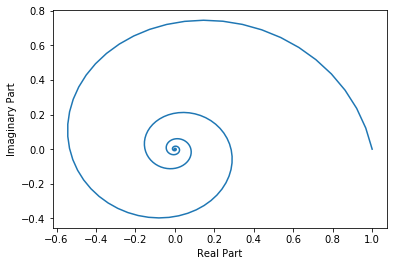

In [3]:
var("t")
sig = exp(-t)*exp(I*5*t)
real = lambdify(t,re(sig),'numpy')
imag = lambdify(t,im(sig),'numpy')
tvals = np.linspace(0,10,400)
plt.plot(real(tvals),imag(tvals));
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part");

----
**Q:** Why Laplace? Why does it help to have systems in frequency domain?
    
**A:** It does make the math easier, which was especially important about 60 years ago when it was all being developed without fancy computers. Many mathematical results about control systems were figured out back then that we still use. Most control engineering these days is probably done in the time domain though.

----
**Q:** Does $u$ gain dimensions as we combine systems?
    
**A:** It can, but doesn't have to. However, $\x$ will likley gain dimensions.

----
**Q:** What is your favorite movie?

**A:** Groundhog day.

---
**Q:** What is your research about?

**A:** We design, build, and test new genetic parts for living system. 

---
**Q:** Is there a way to build systems out of eigenvalues?
    
**A:** Yes, its called physical variable form. 


---
**Q:** What happened to $D$?

**A:** $D$ would be non-zero if some multiple of the control input $u$ somehow ended up directly affecting the output. You might end up with something like $y = x + u$. That's kind of a bad design though, so we usually don't see $D \neq 0$.

Note that if you had a nonlinear system with $y=g(x,u)$ you could get a $D$ matrix from that if it happened that $$\frac{\partial g}{\partial u}$$ was not zero even with $x$ and $u$ equal to zero.

---
**Q:** Where does the $X(s)$ and $H(s)$ come from in the notes?

**A:** When we are reasoning about transfer functions, we'll often introduce new variables to represent temporary quantities and internal signals. 

---
**Q:** Can you give an example where $A$ is not invertible and show how different systems give different trajectories? 

**A:** Sure. The simplest one is one-dimensional:

$$
\dot x = u \\
y = x
$$

In this case, if $u=0$ then the system doesn't go anywhere, so whatever the initial condition is is also the final value.

---
**Q:** Where did 

$$
T = \frac{G}{1+GH}
$$

come from? 

**A:** This is the transfer function of a feedback system with $G$ on the forward path and $H$ on the reverse path. See "Example: Feedback" in the section on "Block Diagrams in Frequency Domain" in the [lecture on combinations of systems](https://colab.research.google.com/github/klavins/ECE447/blob/master/lectures/combinations.ipynb).

---
**Q:** Why does sensitivity range between -1 and 1?

**A:** It doesn't, although many examples work out that way. Here's an example where you can get any positive sensitivity you want:

In [96]:
var("x")
y = exp(x)
S = diff(y,x)*(x/y)
S

x

---
**Q:** How does a controller get implemented? Can we use the block diagram, transfer function, or $A$, $B$, and $C$ matrices to build a controller?

**A1:** Yes! A controller is a block in a block diagram. It has its own transfer function. This, you need to build a device that implements that transfer function and hook it up to the plant according to the wiring in the block diagram.

Controllers are implemented in many different ways. For example, the steam engine movie I showed at the beginning of the course implemented a proportional controller with a flyball governor. Your nervous system implements control of your body using neural networks. The Internet implements traffic control using code written in C that measures packet losses and throttles the rate it sends packets. In electronics, you can implement any transfer function using op-amps, resistors, and capacitors (See Ch 2, Section 2.4).

**A2:** We will do some work on discrete time systems that can be implemented on a microcontroller later in the course. Pseudocode looks like this:

    init:
        # initialize vector of internal states
        z = 0 

    loop:
    
        # Get sensor value
        y = read_sensors()
        
        # Compute control. Note: A, B, and C here are
        # the controller's A, B and C, not the plant's.
        # Also, this is in discrete time (see chapter 13).
        z = delta*(A*z + B*y)
        u = C*z
        write_effector(u)

**A3:** You will learn how to do this with hardware in ECE 448 and ECE 449.

---
**Q:** What is a deep neural network.
        
**A:** We'll hopefully get to this in class. For now, try out some example Python notebooks by scrolling to the bottom of [this page](https://colab.research.google.com/notebooks/welcome.ipynb).

---
**Q:** Where do we put the controller in a system? Is there only one?
        
**A:** Usually the controller takes $r-y$ as input and produces $u$, the input to the plant, as output. You can also have it take $y$ as in input, and then have $r - Gc y$ go to the plant. Several other options exist as well. You just want the whole block diagram to behave as desired. And no, there is not only one. For example, we did an inner-loop, outer-loop example that had two.

---
**Q:** Are the zeros in a transfer function important to control system design?
        
**A:** Yes! While the poles (or eigenvalues) affect the stability and rate of exponential decay, the poles affect the shape of the system's response. For example, consider the system

$$
T(s) = \frac{s+z}{s^2+2s+2}
$$

with a step input $R(s) = 1/s$. The plot below shows the affects of different values for z. 

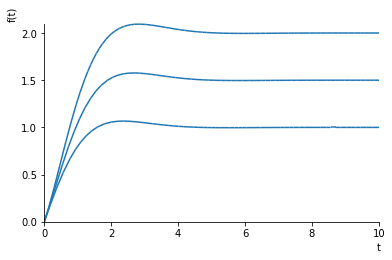

In [20]:
var("s")
var("z", real=True)
var("t", real=True, positive=True)

T = (s+z)/(s**2+2*s+2)
R = 1/s
Y = T*R

y1 = inverse_laplace_transform(Y.subs(z,2),s,t)
y2 = inverse_laplace_transform(Y.subs(z,3),s,t)
y3 = inverse_laplace_transform(Y.subs(z,4),s,t)
y1
plots = plotting.plot(y1,y2,y3,(t,0,10))

---
**Q:** Is there a coordinate system in which the math is the simplest?

**A:** Coordinate systems in which $A$ is diagonal or in Jordan form are probably the easiest to reason about because the eigenvalues are on the diagonal. That said, they usually don't give you much intuition about what the variables mean like physical variable form does.

---
**Q:** How do we assign meaning to $x_1$, $x_2$, etc.

**A:** It depends on the problem. For example, suppose you had a falling object with position $x_1$ and velocity $x_2$. Then you would have

$$
\dot x_1 = x_2 \\
\dot x_2 = -mg 
$$

So the meanings of the two variables are the position and velocity of the object.

However, suppose we now change variables, defining

$$
z_1 = x_1 + x_2 \\
z_2 = x_1 - x_2
$$

Then 

$$
x_1 = \frac{1}{2}(z_1 + z_2) \\
x_2 = \frac{1}{2}(z_1 - z_2)
$$

and 

$$
\dot z_1 = \dot x_1 + \dot x_2 \\
\dot z_2 = \dot x_1 - \dot x_2
$$

By substituting in the above we get

$$
\dot z_1 = \frac{1}{2}z_1 - \frac{1}{2}z_2 + mg \\
\dot z_2 = \frac{1}{2}z_1 - \frac{1}{2}z_2 - mg 
$$

The two sets of differential equations represent **the same system**.

What are the meanings of $z_1$ and $z_2$? There isn't much else you can say than that $z_1$ is the sum of the position and velocity and $z_2$ is the difference. The units don't even make sense. 

In general, unless you use some kind of physical variable form, the best you can say is that the state variables are linear combination of the physical variables in the system.

**Q:** What's with these summation thingys?

**A:** The inputs are whatever the signals are, and the output is the sum of the signals on the input wires times times the signs written on those wires. Here's a diagram:

<img width=40% src="https://www.techtransfer.com/wp-content/uploads/image002.jpg">

---
**Q:** What's special about negative feedback?

**A:** Think about trying to control your speed while driving. If you are going to fast, you slow down. If you are going to slow, you speed up. That's negative feedback. In math, 

$$
u = K ( \mathrm{desired\;speed} - \mathrm{actual\;speed} )
$$

You can see the speed being negated, amplified, and being sent back into the system.

Positive feedback would be the opposite, and doesn't usually work. If you are going to fast, speed up? Going to slow, slow down? 

---
**Q:** When we have more than just $x_1$ and $x_2$, what do the additional dimensions mean? Can we represent them graphically?

**A:** More than two dimensions would mean more stuff is moving or changing in your system. Consider an airplane. It has an $x$, $y$, $z$ position, a roll, pitch, and a yaw, as well as velocities of these systems. Thus, an airplane is a 12 dimensional system. How can you visualize it? It can be difficult. Usually we plot two or three of the dimensions a t a time. Or plot summary information, like the total kinetic energy of the airplane, or the heading, etc.

---
**Q:** Do all the different forms essentially serve the same purpose with just different methods to compute things and different readability? 

**A:** Yes!

---
**Q:** How do you create a block diagram from a state space representation?
    
**A:** First, put in an integrator block for each variable, showing the relationship between the $x_i$ and the $\dot x_i$. Then hook up all the wires with gains on them according to the matrices. Best to do an example on the board. 

---
**Q:** In block diagrams, how do you know when things are multiplied or added?

**A:** In frequency domain, two blocks in series are multiplied. The only adding going on will be with the summation points, as described above.

---
**Q:** How do I plot the response of a given transfer function? 

**A1:** Answers below

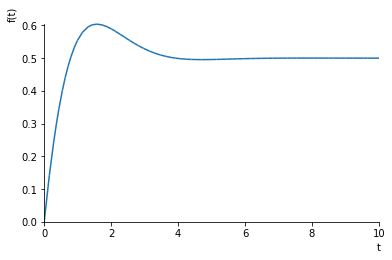

⎛   t                      ⎞  -t
⎝2⋅ℯ  + 2⋅sin(t) - 2⋅cos(t)⎠⋅ℯ  
────────────────────────────────
               2        2       
       (-1 + ⅈ) ⋅(1 + ⅈ)        

In [23]:
# Method 1: Use the inverse Laplace transform and sympy's plotting function.

var("s")
var("t", real=True, positive=True)

T = (s+1)/(s**2+2*s+2)
R = 1/s
Y = T*R

y = inverse_laplace_transform(Y.subs(z,2),s,t)
plotting.plot(y,(t,0,10));
y

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


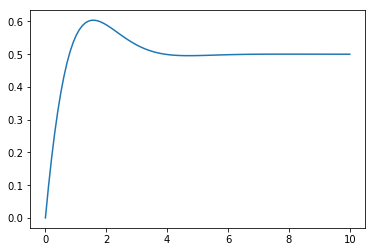

In [54]:
# Method 2: Use the same function, but with numpy and matplotlib

tvals = np.linspace(0,10,100);
f = lambdify(t,y,'numpy');
plt.plot(tvals,f(tvals));

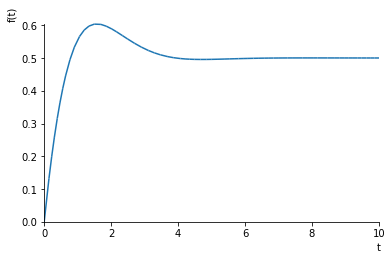

In [55]:
# Method 3: Convert to state space and then plot

var("tau")

# Define matrices
A = Matrix([
    [0,1],
    [-2,-2]
]);
B = Matrix([[0],[1]])
C = Matrix([[1,1]])

# Initial condition (assumed by inverse laplace)
x0 = Matrix([[0],[0]])

# Input
u = 1

# Output
y = C*exp(A*t)*x0 + integrate(C*exp(A*(t-tau))*B*u,(tau,0,t))

# Note, the above returns a 1x1 matrix, so we need to get the value out
y = y[0,0]

# Use sympy's plotter. You could also use matplotlib
plotting.plot(y,(t,0,10));

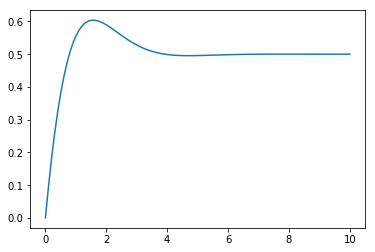

In [94]:
# Method 4: The above symbolic integrations can be very slow, especially with higher dimensional systems.
# Instead you can numerically integrate them, which gives you a simulation.

def f(x,t):
    x = A*Matrix(x) + B
    return np.array(x).astype(np.float64).flatten()

t = np.linspace(0,10,100);
x = spi.odeint(f,[0,0],t);
y = C[0,0]*x[:,0] + C[0,1]*x[:,1]
plt.plot(t,y);

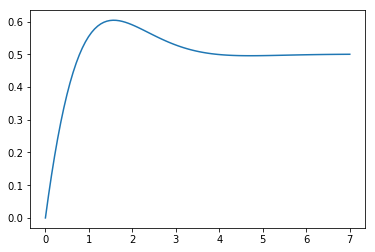

In [95]:
# Method 5: You can use the control systems toolbox
# To install this in colab, you will need to do
#
#    !pip install control
#

from control import *

sys = tf([1,1],[1,2,2])
t,y = step_response(sys)
plt.plot(t,y);

---
**Q:** If the response of a system is a sine wave, does it have a steady state error?

**A:** No. Only stable systems have steady state errors. A system whose response to a step input is a sine wave would have eigenvalues $\pm a i$ for some $a>0$ (i.e. no real part). 

---
**Q:** Can we compute the sensitivity and error of blocks and infer the sensitivity and error of a whole block diagram? I.e. are these quantities "modular"?

**A:** Not in general.

---
**Q:** How *long* does it take for a system to reach steady state?

**A:** That's what we'll talk about today (in the notebook called "performance").

---
**Q:** You said the integrator introduces memory into the system. But a system can't remember everything. What exactly is an integrator remembering?

**A:** Since it integrates its input and saves the integral within it somehow, an integral control just remembers that one thing: What is the sum (or integral) of my inputs so far. What we really mean when we say a control system has memory is that what it outputs depends not just on its current input, but on all the inputs it has ever received. In contrast, a simple gain block has "no memory". 

---
**Q:** Are there examples of open loop controllers? Why would you design one?

**A:** Ballistics is an example. You estimate the distance to the hoop and throw the ball so that it goes exactly the right distance with the right spin.

An automated car-wash takes you car in, applies a bunch of soap and brushing, but never checks how clean your car is getting. A toaster is similar. 

Many factory automation systems are open loop as well. For example, a car painting robot basically follows a fixed path in space and releases paint at a pre-programmed rate. No feedback about coverage is used.

---
**Q:** How do we add integrators or poles to the transfer function to get the desired steady state error to zero?

**A:** You add them to the controller, as in PI control. See the notebook on test functions.

---
**Q:** How big should the settling time region (i.e. $\delta$) be?

**A:** Depends on the problem and your performance specifications. The choices of $\delta = 0.02$ is arbitrary, but the math of how to compute the settling time is not.

---
**Q:** Where do $\omega$ and $\zeta$ come from?

**A:** See examples in the root locus design notebook.

---
**Q:** Is the archetypal transfer function useful in designing other systems?

**A:** Yes. Often we design a system to have two dominant poles so that it behaves more or less like like a second order system.

---
**Q:** How do the poles are zeros affect behavior?

**A:** See the root locus notebook.

---
**Q:** With machine learning, can we tell the machine to "do whatever it takes" to maintain a desired equilibrium?

**A:** Depends on how smart the machine is. Machine learning is not magical. It can still only do what it was programmed to do. Hopefully we'll see examples of how it works by the end of the quarter.

---
**Q:** What are the types of controllers we will focus on in this class?

**A:** We will focus on 
- P, PI and PID
- Root locus based control
- Full state feedback
- Reinforcement learning (hopefully)

---
**Q:** Is the line toward negative $i\infty$ above or below the axis?

**A:** Neither. It is on the axis.

---
**Q:** If you have two dominant roots and one really negative root, do you have to worry about it?

**A:** Depends on how negative it is. It is best to design your system with respect to the dominant roots, and the analyze with respect to all roots.

---
**Q:** Is a gain of $\infty$ reasonable?

**A:** No.

---
**Q:** Does the shape of the curve the poles travel on mean anything?

**A:** It spans the range of poles you can get for different values of $K$. Hopefully you can adjust the shape so that it goes through a particularly desirable pole.

---
**Q:** Do we need to accommodate for error from the modeling department?

**A:** Yes. Although they should also tell you what kinds of errors are most likely.

---
**Q:** Is there a case where we want to dynamically tune $K$ to change performances depending on the situation?

**A:** Sort of. See [gain scheduling](https://en.wikipedia.org/wiki/Gain_scheduling).

---
**Q:** When do we need PI versus PID? Can root locus handle any transfer function?

**A:** You need the $I$ for zero steady error (if that is important to you). You need the $D$ if it turns out that the rate of change of your output makes it easier to control it. In terms of root locus, PI is putting down one pole and one zero, and PID is putting down two poles and one zero. And yes, root locus methods can handle pretty much any transfer function. However, whether you can implement any transfer function depends on the actual system. 

---
**Q:** What does *dominant poles* mean?

**A:** Poles that are closer to the imaginary axis dominate the response of a system. For example, suppose we have a system like

$$
T(s) = \frac{1}{(s+1)(s+100)}
$$

The step response of this system is

$$
y(t) = \frac{1}{10} - \frac{1}{9}e^{-t} + \frac{1}{90}e^{-10t}
$$

The poles show up in the solution as rates of decay of the exponentials. The exponential $e^{-10t}$ decays much faster than the $e^{-t}$, so the shape of the whole curve is "dominated" by the pole at -1. You can see this in a plot as well.

Text(0.5, 0, 't')

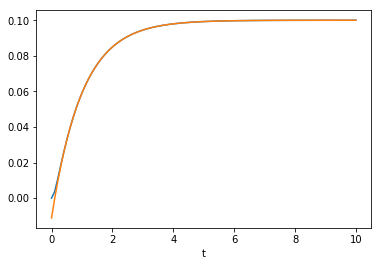

In [29]:
t = np.linspace(0,10,100)
plt.plot(t,1/10-np.exp(-t)/9+np.exp(-10*t)/90, label="y(t)")
plt.plot(t,1/10-np.exp(-t)/9, label="y(t) w/o -10 pole term")
plt.xlabel("t")

---
**Q:** How do the zeros shape the response?

**A:** By multiplying the exponential decay terms. For example:

In [3]:
var("s t a")
var("t a", real=true, positive=true)
T = (s+a) / ( s**2 + 2*s + 2 )
Y = (1/s)*T
y = inverse_laplace_transform(Y,s,t)
# y.simplify()

In [4]:
y

  ⎛   t                                 ⎞  -t             
2⋅⎝a⋅ℯ  - a⋅sin(t) - a⋅cos(t) + 2⋅sin(t)⎠⋅ℯ  ⋅Heaviside(t)
──────────────────────────────────────────────────────────
                           2        2                     
                    (1 - ⅈ) ⋅(1 + ⅈ)                      

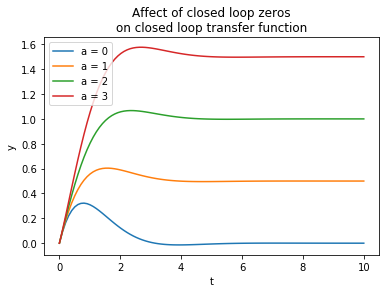

In [121]:
var("b")
f = lambdify([t,b], y.subs(a,b), 'numpy')
tvals = np.linspace(0,10,100)
for b in [0,1,2,3]:
    plt.plot(tvals,np.real(f(tvals,b)),label="a = %d" % b)
plt.legend();
plt.xlabel("t")
plt.ylabel("y");
plt.title("Affect of closed loop zeros\non closed loop transfer function");

In [122]:
# Zeros in the open loop system can show up in the numerator and 
# the denominator of the closed loop transfer function. 
G = (s+a) / (s**2+s)
T = G / ( 1 + G)
T.cancel()

   a + s    
────────────
     2      
a + s  + 2⋅s

In [123]:
Y = (1/s)*T
y = inverse_laplace_transform(Y,s,t)
y

    ⎛       ⎛   ⎛atan2(0, -a + 1)⎞   _________    ⎞             ⎛atan2(0, -a +
    ⎜     t⋅⎜cos⎜────────────────⎟⋅╲╱ │a - 1│  + 1⎟      2⋅t⋅cos⎜─────────────
  2 ⎜       ⎝   ⎝       2        ⎠                ⎠             ⎝       2     
-a ⋅⎜- 2⋅ℯ                                          + ⅈ⋅ℯ                     
    ⎝                                                                         
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              
                                                                              

 1)⎞   _________                                                    ⎛atan2(0, 
───⎟⋅╲╱ │a - 1│                                              2⋅t⋅cos⎜─────────
   ⎠                ⎛     ⎛atan2(0, -a + 1)⎞   _________⎞           ⎝       2 
                ⋅sin⎜t⋅sin⎜────────────────⎟⋅╲╱ │a 

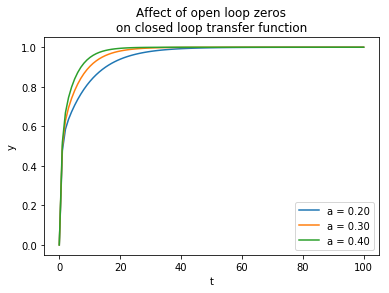

In [125]:
var("b")
f = lambdify([t,b], y.subs(a,b), 'numpy')
tvals = np.linspace(0,100,100)
for b in [0.2,0.3,0.4]:
    plt.plot(tvals,np.real(f(tvals,b)),label="a = %.2f" % b)
plt.legend()
plt.xlabel("t")
plt.ylabel("y");
plt.title("Affect of open loop zeros\non closed loop transfer function");

---
**Q:** How do plot a step response using the various methods available?

**A:** You can use sympy's plotting tool, convert sympy to numpy and use matplot lib, or use the control system toolbox. These are illustrated below.

In [40]:
# First, define a system and get a formula for its step response

A = Matrix([
    [-1,1],
    [0,-2]
])
B = Matrix([
    [0],
    [1]
])
C = Matrix([[1,0]])

# Assume natural response is zero since x[0] = 0 for step response plots
# Note that the integration below can kill sympy for n larger than 2, so 
# this isn't the best method.
var("t tau")
y = integrate(C*exp(A*(t-tau))*B*1,(tau,0,t))[0]
y

           -2⋅t
1    -t   ℯ    
─ - ℯ   + ─────
2           2  

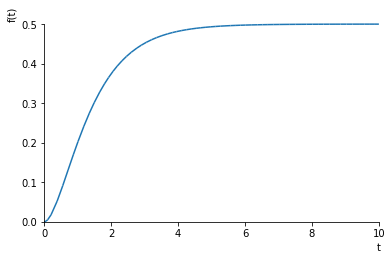

In [19]:
# Use sympy's plotting routine
plotting.plot(y,(t,0,10));

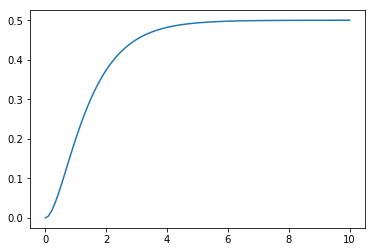

In [20]:
# Converty to numpy and use matplotlib
f = lambdify(t, y, 'numpy')
tvals = np.linspace(0,10,100)
plt.plot(tvals, f(tvals));

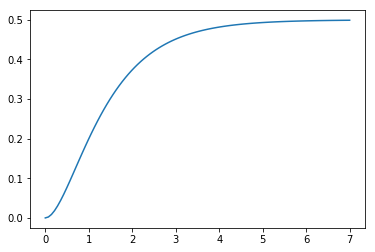

In [25]:
# Use the control systems toolbox
An = np.array(A).astype(np.float64)
Bn = np.array(B).astype(np.float64)
Cn = np.array(C).astype(np.float64)
Dn = np.array([[0]])
sys = ss(An,Bn,Cn,Dn)
t, y = step_response(sys)
plt.plot(t,y);

---
**Q:** How do you go from a performance specification like 10% overshoot and a settling time of 2s, using the 2nd order pole approximation?

**A:**: Translating into second order pole locations, we want the percent overshoot to be

$$
e^{-\frac{\zeta \pi}{\beta}} = 0.1
$$

and the settling time to be

$$
\frac{4}{\zeta\omega} = 2 
$$

Solving these equations is done below with sympy.

In [37]:
var("zeta omega")
z,w = solve([exp(-zeta*pi/sqrt(1-zeta**2)) - 0.1, 4 / (zeta * omega) - 2], [zeta, omega])[0]
z,w

(0.591155033798898, 3.38320725639016)

The pole positions are then $\zeta\omega \pm \beta\omega j$.

In [38]:
-z*w + w*sqrt(1-z**2)*I

-2.0 + 2.72875270768368⋅ⅈ

---
**Q:** What does full rank mean and how do you know if you have it?

**A:**: Full rank of a matrix $A$ means that columns (or rows) of $A$ are all independent. In that case, $A$ can be inverted. A test for full rank is to test whether the determinant of $A$ is non-zero.


---
**Q:** What is $r$?

**A:**: $r$ is the new input to a system after we've wrapped a feedback loop around it. The old input was $u$, the new input is what we desire $y$ to converge to.


---
**Q:** What if we have a zero really close the our desired poles in the root locus method? 

**A:**: Then some pole is going to go there as you turn up $K$, making your desired poles not be dominant, and the method doesn't work very well. One thing you can try is approximate pole zero cancellation, but it is an art more than a science.


---
**Q:** When would we add a differential term? 

**A:**: Typically you do not add zeros at zero, but rather zeros at some left-half plan place. Thus, you would rarely see a $G_c$ that did not have a constant term in in.


---
**Q:** Are there any limitations on how many inputs and outputs you can have? Does then number of inputs have to be greater than then number of outputs?

**A:**: No and no.


---
**Q:** What is $K G(s)$?

**A:**: That would refer to a simple gain controller $K$ multiplied by a plant $G$ and probably intended to be put into a feedback configuration.


---
**Q:** Where are the ideal places to put the poles of $A-LC$ in observer design?

**A:**: Generally, they should be 2 to 10 times smaller than your systems' natural (or full state feedback) poles. Remember that the observer is sensitive to sensor noise, so you don't want to amplify that too much.


---
**Q:** Does every system's performance decay as you increase the sampling time in discretization of a continuous system?

**A:**: Generally, yes.


---
**Q:** How are eigenvalues and poles related?

**A:**: Poles are a transfer function thing and eigenvalues are a state space thing. They are generally the same, as long as the transfer function does not have pole-zero cancellations, and the state space is in what's called "minimal form": i.e. it has the minimal number of states to give you the transfer function.


---
**Q:** Is bang-bang control more efficient?

**A:**: Not necessarily. It could require huge amounts of energy. But it is the fastest.


---
**Q:** Do you use math outside the classroom?

**A:**: Yes. I use it for pretty much every aspect of my research and some hobbies!
